In [131]:
# Deep Insights for NEET Telangana 2024 vs 2025 Data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import percentileofscore


In [132]:
# Data Preprocessing.
neet_2024 = pd.read_csv('neet_tg_data_2024.csv')

cols_2024 = neet_2024.columns.values.tolist()

cols_2024_rename_map = {}

for col in cols_2024:
    cols_2024_rename_map[col] = col.lower().replace('.', '').replace('\n','_')


neet_2024.rename(columns=cols_2024_rename_map, inplace=True)

neet_2025 = pd.read_csv('neet_tg_data.csv',names=cols_2024_rename_map.values(), header=0)

neet_2025['year'] = 2025
neet_2024['year'] = 2024

In [133]:
neet_2024.head()

,sno,neet_rank,roll,name,gender,category,ph,score,year
0,102,5200,4204040167,SINGANAMALLA JAYA AKASH,Male,General,No,685,2024
1,103,5358,4208090053,KASAPURAM ABHINAV,Male,OBC-(NCL) As Per Central List,No,685,2024
2,104,5487,3115230253,SURA SHASHIDHAR,Male,OBC-(NCL) As Per Central List,No,685,2024
3,105,5647,3903250656,POOJA,Female,OBC-(NCL) As Per Central List,No,685,2024
4,106,5860,4201480273,GUNDETI ARTI,Female,General,No,683,2024


In [134]:
neet_2025.head()

,sno,neet_rank,roll,name,gender,category,ph,score,year
0,1,18,4201503161,KAKARLA JEEVAN SAI KUMAR,Male,General,No,670,2025
1,2,37,4201106009,SHANMUKHA NISHANTH AKSHINTALA,Male,General,No,660,2025
2,3,46,4201110003,MANGARI VARUN,Male,OBC- NCL (Central List),No,656,2025
3,4,48,4201212077,YANDRAPATI SHANMUKH,Male,OBC- NCL (Central List),No,656,2025
4,5,95,4204103247,BIDISHA MAJEE,Female,General,No,646,2025


In [135]:
neet_combined = pd.concat([neet_2024, neet_2025], ignore_index=True,axis=0)
neet_combined['score'] = pd.to_numeric(neet_combined['score'], errors='coerce')
neet_combined.dropna(subset=['score'], inplace=True)

neet_combined.loc[:,'category'] = neet_combined.loc[:,'category'].str.replace('OBC-(NCL) As Per Central List', 'OBC- NCL (Central List)')


In [136]:
neet_combined.head()

,sno,neet_rank,roll,name,gender,category,ph,score,year
0,102,5200,4204040167,SINGANAMALLA JAYA AKASH,Male,General,No,685,2024
1,103,5358,4208090053,KASAPURAM ABHINAV,Male,OBC- NCL (Central List),No,685,2024
2,104,5487,3115230253,SURA SHASHIDHAR,Male,OBC- NCL (Central List),No,685,2024
3,105,5647,3903250656,POOJA,Female,OBC- NCL (Central List),No,685,2024
4,106,5860,4201480273,GUNDETI ARTI,Female,General,No,683,2024


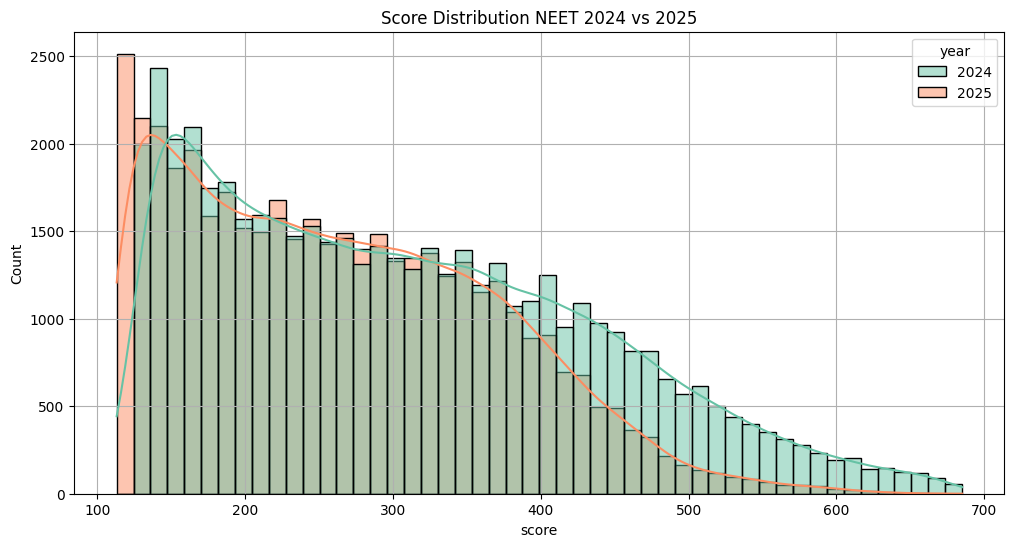

In [ ]:
# Score distribution across years
plt.figure(figsize=(12,6))
sns.histplot(data=neet_combined, x='score', hue='year', bins=50, kde=True, palette='Set2')
plt.title('Score Distribution NEET 2024 vs 2025')
plt.grid(True)
plt.show()

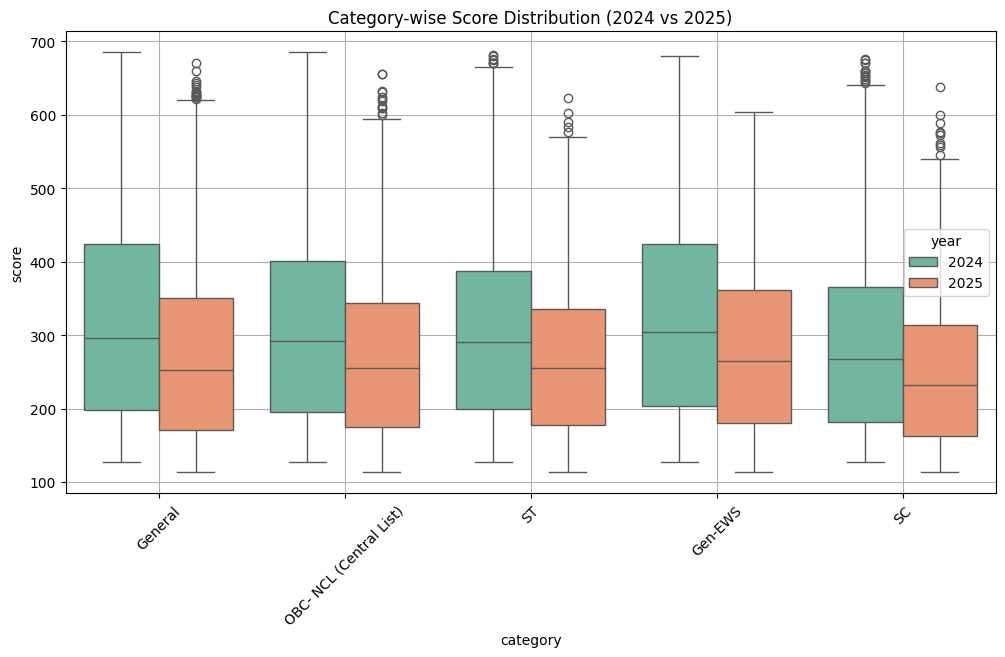

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=neet_combined, x='category', y='score', hue='year',palette='Set2')
plt.xticks(rotation=45)
plt.title('Category-wise Score Distribution (2024 vs 2025)')
plt.grid(True)
plt.show()


In [ ]:
# Category-wise mean, median and cutoff trends
agg_stats = neet_combined.groupby(['year', 'category'])['score'].agg(['mean', 'median', 'std', 'min', 'max'])
print("Category-wise Stats:\n", agg_stats)

Category-wise Stats:
                                     mean  median         std  min  max
year category                                                         
2024 Gen-EWS                  321.671281   304.0  135.733629  127  680
     General                  320.954318   296.0  142.163185  127  685
     OBC- NCL (Central List)  307.146043   292.0  127.733886  127  685
     SC                       283.087456   267.0  114.102236  127  676
     ST                       298.873062   290.0  114.904805  127  681
2025 Gen-EWS                  276.111565   265.0  109.167700  113  604
     General                  270.934079   253.0  114.862403  113  670
     OBC- NCL (Central List)  265.380314   255.0  103.902977  113  656
     SC                       243.516215   232.0   91.874483  113  638
     ST                       260.776821   255.0   95.133613  113  623


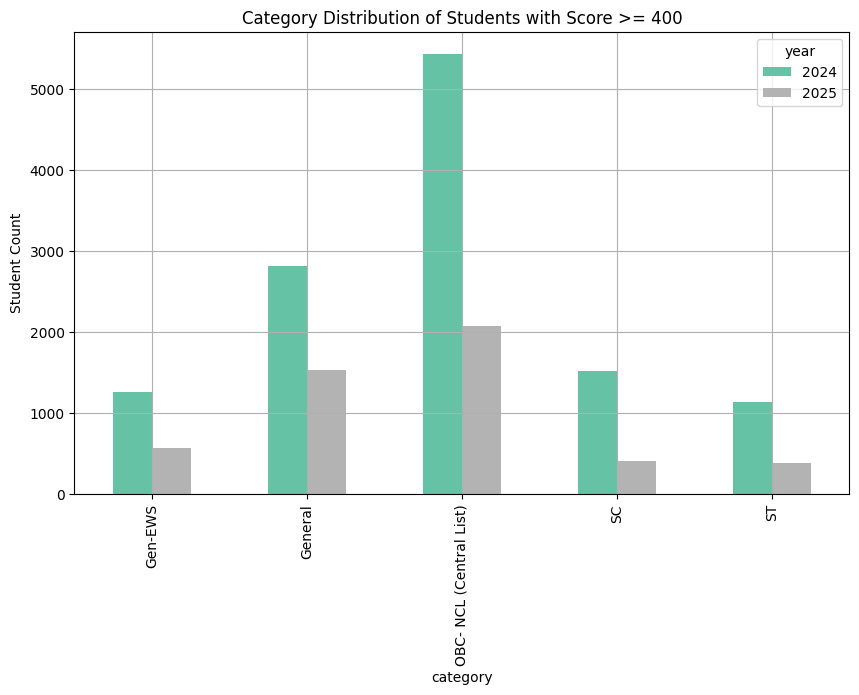

In [ ]:
mark_cutoff = 400
high_scorers = neet_combined[neet_combined['score'] >= mark_cutoff]
high_cat_dist = pd.crosstab(high_scorers['category'], high_scorers['year'])
high_cat_dist.plot(kind='bar',figsize=(10,6), colormap='Set2')
plt.title(f'Category Distribution of Students with Score >= {mark_cutoff}')
plt.ylabel('Student Count')
plt.grid(True)
plt.show()

C:\Users\nkrahul\AppData\Local\Temp\ipykernel_3348\235182583.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  score_cat_pivot = pd.pivot_table(neet_2025, index='category', columns='score_bin', values='name', aggfunc='count', fill_value=0)


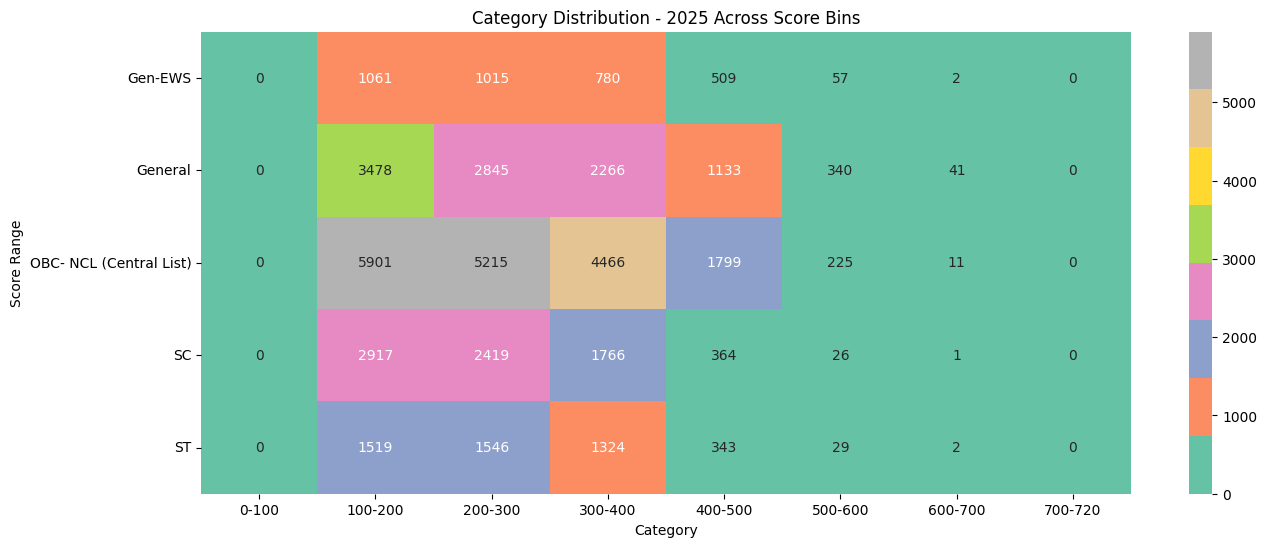

In [ ]:
# Which Category Dominated score bucket this year.

neet_2025['score_bin'] = pd.cut(neet_2025['score'], bins= [0, 100, 200, 300, 400, 500, 600, 700, 720], 
                                    labels=['0-100', '100-200', '200-300', '300-400', '400-500', '500-600', '600-700', '700-720'])

score_cat_pivot = pd.pivot_table(neet_2025, index='category', columns='score_bin', values='name', aggfunc='count', fill_value=0)

plt.figure(figsize=(15,6))
sns.heatmap(score_cat_pivot, annot=True, fmt="d", cmap="Set2")
plt.title("Category Distribution - 2025 Across Score Bins")
plt.ylabel("Score Range")
plt.xlabel("Category")
plt.show()

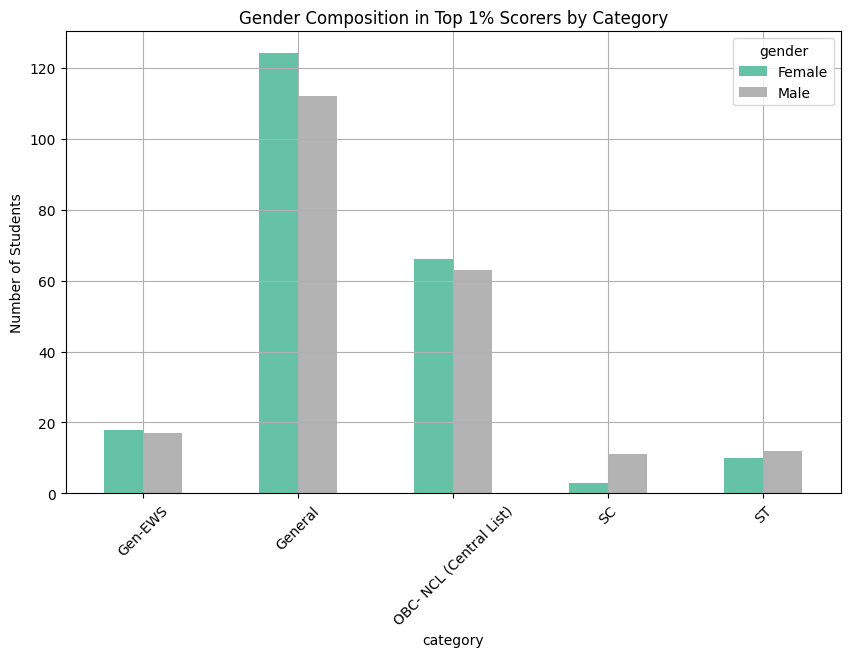

In [ ]:
top_1_percent_cutoff = np.percentile(neet_2025['score'], 99)
top_1_df = neet_2025[neet_2025['score'] >= top_1_percent_cutoff]

gender_cat_top1 = pd.crosstab(top_1_df['category'], top_1_df['gender'])

gender_cat_top1.plot(kind='bar', figsize=(10,6), colormap='Set2')
plt.title("Gender Composition in Top 1% Scorers by Category")
plt.ylabel("Number of Students")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
